<a href="https://colab.research.google.com/github/manasa-rajesh/Image_Watermarking/blob/main/Image_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [29]:
import cv2
import numpy as np
import requests
from PIL import Image

## Loading Image

In [30]:
image = Image.open('image.jpg')

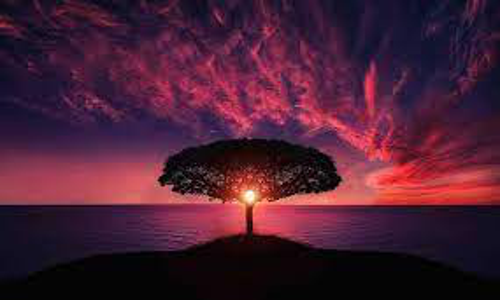

In [31]:
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

## Loading Watermark

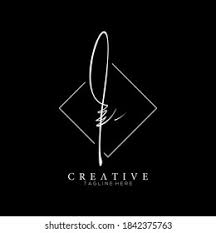

In [32]:
logo = Image.open('watermark.jpg')
logo

In [33]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

## Find the center of the image

In [34]:
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

## Region of Interest

In [35]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

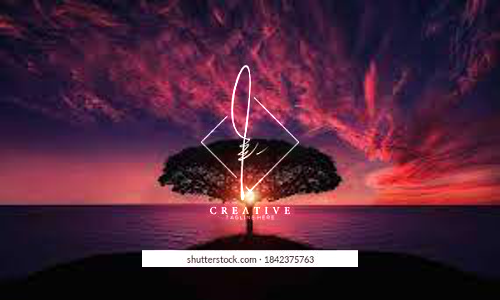

In [36]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

## Text Watermark

In [37]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Watermark', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

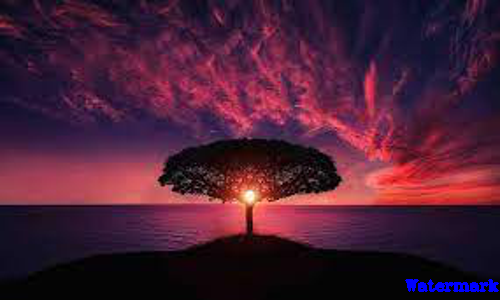

In [38]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg